### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from numpy.random import seed
from scipy.stats import shapiro

### Get data

In [2]:
all_df = pd.read_csv('all_data.csv').set_index('date')
all_df

nonfarm_payroll  payroll_delta_1m  payroll_delta_3m  \
date                                                              
1939-01-01          29923.0               NaN               NaN   
1939-02-01          30100.0          0.591518               NaN   
1939-03-01          30280.0          0.598007               NaN   
1939-04-01          30094.0         -0.614267          0.571467   
1939-05-01          30299.0          0.681199          0.661130   
...                     ...               ...               ...   
2022-01-01         149744.0          0.337711          1.174960   
2022-02-01         150458.0          0.476814          1.214918   
2022-03-01         150856.0          0.264526          1.082820   
2022-04-01         151292.0          0.289017          1.033764   
2022-05-01         151682.0          0.257780          0.813516   

            payroll_delta_6m  payroll_delta_12m  payroll_diff_12m_1m  \
date                                                                   
1939-01-01               NaN                NaN                  NaN   
1939-02-01               NaN                NaN                  NaN   
1939-03-01               NaN                NaN                  NaN   
1939-04-01               NaN                NaN                  NaN   
1939-05-01               NaN                NaN                  NaN   
...                      ...                ...                  ...   
2022-01-01          2.293236           4.703637             4.365926   
2022-02-01          2.419267           4.683184             4.206370   
2022-03-01          2.394657           4.448491             4.183965   
2022-04-01          2.220871           4.559968             4.270951   
2022-05-01          2.038318           4.506652             4.248872   

            payroll_diff_12m_3m  payroll_diff_12m_6m  policy_rate  \
date                                                                
1939-01-01                  NaN                  NaN          NaN   
1939-02-01                  NaN                  NaN          NaN   
1939-03-01                  NaN                  NaN          NaN   
1939-04-01                  NaN                  NaN          NaN   
1939-05-01                  NaN                  NaN          NaN   
...                         ...                  ...          ...   
2022-01-01             3.528676             2.410400         0.08   
2022-02-01             3.468266             2.263917         0.08   
2022-03-01             3.365671             2.053834         0.20   
2022-04-01             3.526204             2.339097         0.33   
2022-05-01             3.693136             2.468334         0.77   

            policy_rate_1m_ago  ...        sp500  sp500_delta_1m  \
date                            ...                                
1939-01-01                 NaN  ...    12.300000       -6.392695   
1939-02-01                 NaN  ...    12.700000        3.252029   
1939-03-01                 NaN  ...    10.980000      -13.543309   
1939-04-01                 NaN  ...    10.930000       -0.455366   
1939-05-01                 NaN  ...    11.600000        6.129918   
...                        ...  ...          ...             ...   
2022-01-01                0.08  ...  4515.549805       -5.258517   
2022-02-01                0.08  ...  4373.939941       -3.136049   
2022-03-01                0.08  ...  4530.410156        3.577329   
2022-04-01                0.20  ...          NaN             NaN   
2022-05-01                0.33  ...          NaN             NaN   

            sp500_delta_3m  sp500_delta_6m  sp500_delta_12m   vol_30d  \
date                                                                    
1939-01-01       -6.605922       -0.243307        15.060811  1.846643   
1939-02-01       -0.235662        5.306794        11.992942  1.868115   
1939-03-01      -16.438362      -10.294120        29.176465  1.755651   
1939-04-01      -11.138210      -17.008350        11.75

In [4]:
# In experiment 1522, features used are:
features = ['payroll_diff_12m_3m',
         'policy_rate_delta_12m',
         'CPI_delta_12m',
         'yield_10y_delta6m',
         'yield_spread',
         'sp500_delta_12m',
         'vol_30d']


In [5]:
X = all_df[features].copy().dropna()
X

payroll_diff_12m_3m  policy_rate_delta_12m  CPI_delta_12m  \
date                                                                    
1955-07-01             2.935970                   0.88      -0.372301   
1955-08-01             3.494027                   0.74      -0.484171   
1955-09-01             3.931277                   1.11       0.149198   
1955-10-01             4.214637                   1.39       0.374251   
1955-11-01             3.963344                   1.52       0.373413   
...                         ...                    ...            ...   
2021-11-01             3.045375                  -0.01       6.828372   
2021-12-01             3.434245                  -0.01       7.096542   
2022-01-01             3.528676                  -0.01       7.525934   
2022-02-01             3.468266                   0.00       7.912024   
2022-03-01             3.365671                   0.13       8.557586   

            yield_10y_delta6m  yield_spread  sp500_delta_12m   vol_30d  
date                                                                    
1955-07-01               0.29          1.30        40.932648  0.861181  
1955-08-01               0.32          1.07        44.753605  0.712645  
1955-09-01               0.29          0.90        35.159382  1.436967  
1955-10-01               0.13          0.65        33.648989  1.647236  
1955-11-01               0.13          0.65        32.914708  0.858264  
...                       ...           ...              ...       ...  
2021-11-01              -0.06          1.51        26.103444  0.729942  
2021-12-01              -0.05          1.41        26.892739  1.112502  
2022-01-01               0.44          1.61        21.573991  1.122077  
2022-02-01               0.65          1.60        14.766935  1.390119  
2022-03-01               0.76          1.69        14.033116  1.486786  

[801 rows x 7 columns]

### Check the pairwise relationship of each feature

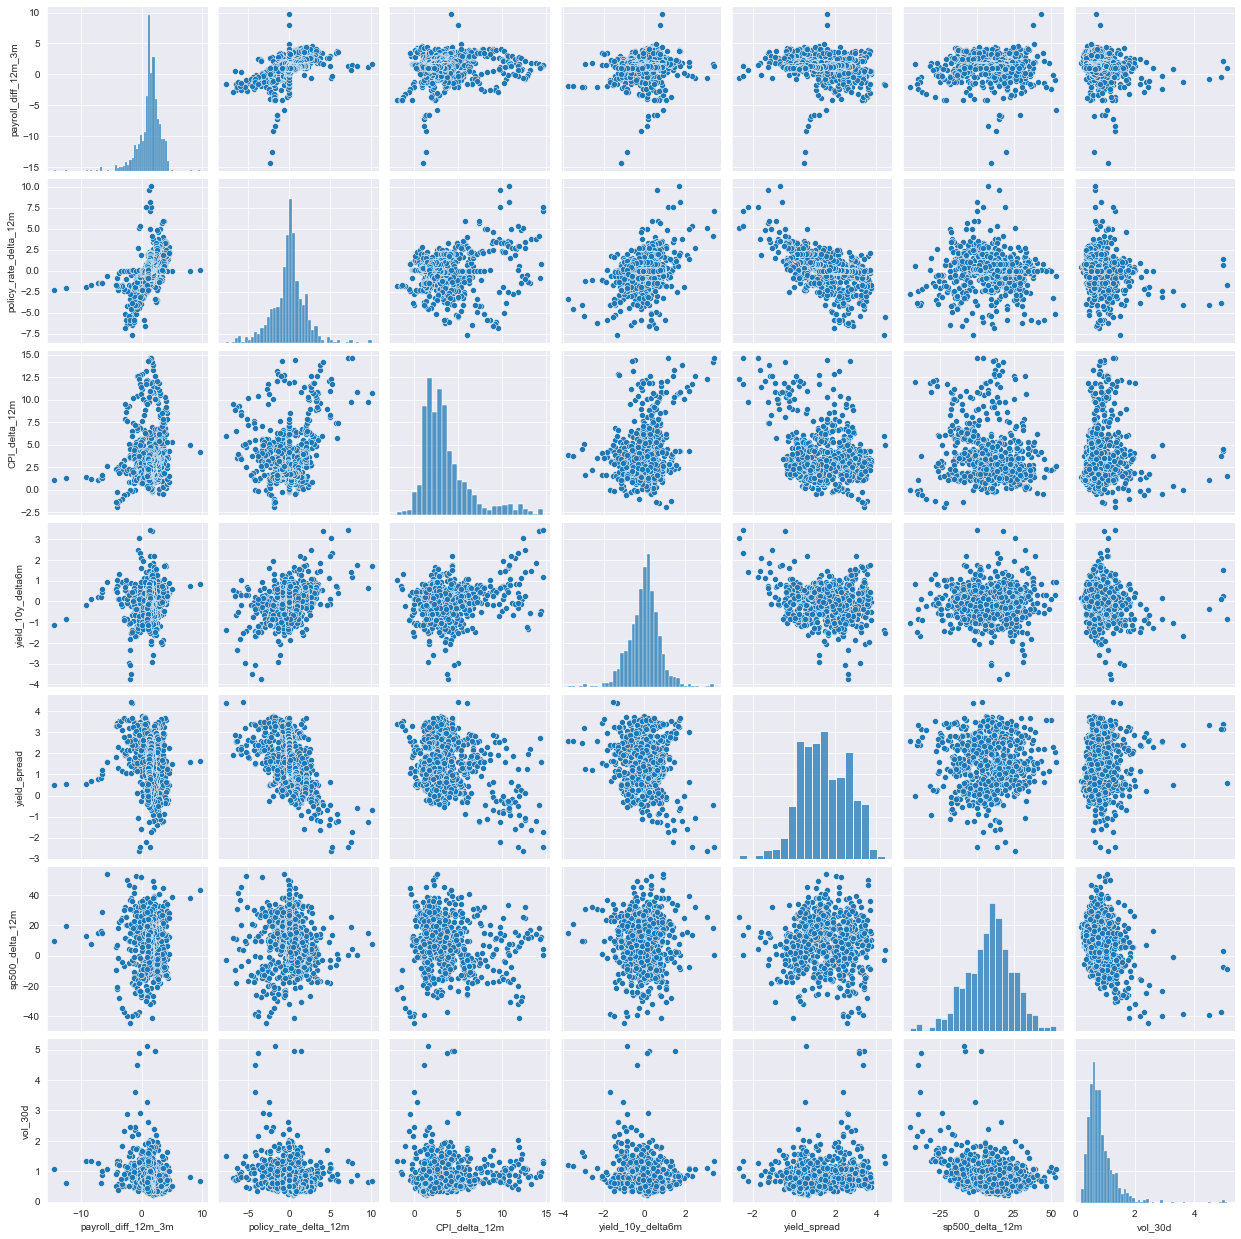

In [6]:
sns.pairplot(X)

### Plot distribution of each feature

C:\Users\zhuk3\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='payroll_diff_12m_3m', ylabel='Density'>

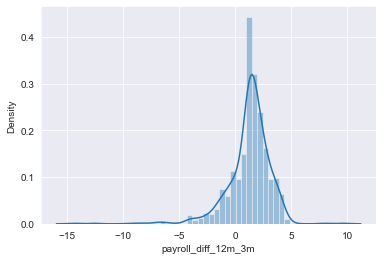

In [7]:
sns.distplot(X['payroll_diff_12m_3m'])

C:\Users\zhuk3\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='policy_rate_delta_12m', ylabel='Density'>

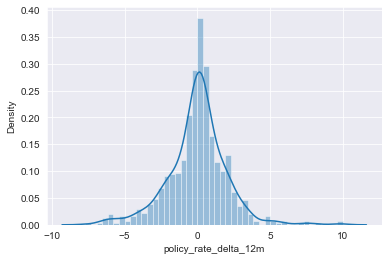

In [9]:
sns.distplot(X['policy_rate_delta_12m'])

C:\Users\zhuk3\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CPI_delta_12m', ylabel='Density'>

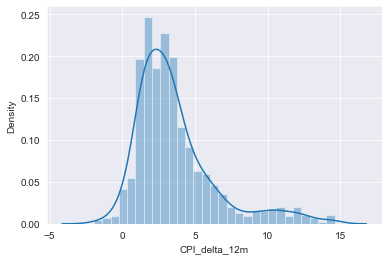

In [10]:
sns.distplot(X['CPI_delta_12m'])

C:\Users\zhuk3\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='yield_10y_delta6m', ylabel='Density'>

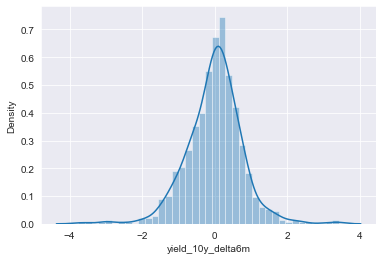

In [11]:
sns.distplot(X['yield_10y_delta6m'])


C:\Users\zhuk3\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='yield_spread', ylabel='Density'>

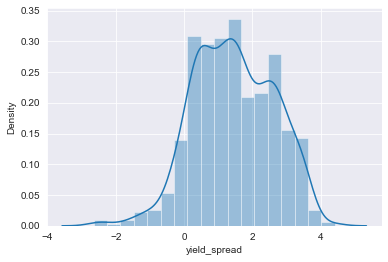

In [12]:
sns.distplot(X['yield_spread'])

C:\Users\zhuk3\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sp500_delta_12m', ylabel='Density'>

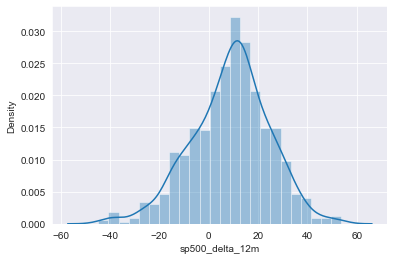

In [13]:
sns.distplot(X['sp500_delta_12m'])

C:\Users\zhuk3\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='vol_30d', ylabel='Density'>

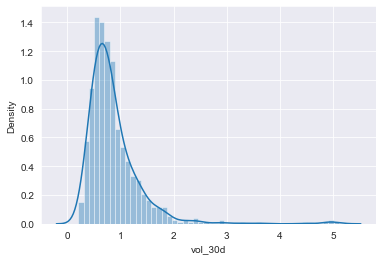

In [14]:
sns.distplot(X['vol_30d'])

### Check if feature is Normally distributed

In [16]:
def check_normality(data):
    # normality test
    stat, p = shapiro(data)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

for fea in X.columns:
    print(f'For feature {fea}, the normality test result is:')
    check_normality(X[fea])
    print(" ")

For feature payroll_diff_12m_3m, the normality test result is:
Statistics=0.856, p=0.000
Sample does not look Gaussian (reject H0)
 
For feature policy_rate_delta_12m, the normality test result is:
Statistics=0.952, p=0.000
Sample does not look Gaussian (reject H0)
 
For feature CPI_delta_12m, the normality test result is:
Statistics=0.856, p=0.000
Sample does not look Gaussian (reject H0)
 
For feature yield_10y_delta6m, the normality test result is:
Statistics=0.964, p=0.000
Sample does not look Gaussian (reject H0)
 
For feature yield_spread, the normality test result is:
Statistics=0.987, p=0.000
Sample does not look Gaussian (reject H0)
 
For feature sp500_delta_12m, the normality test result is:
Statistics=0.992, p=0.000
Sample does not look Gaussian (reject H0)
 
For feature vol_30d, the normality test result is:
Statistics=0.706, p=0.000
Sample does not look Gaussian (reject H0)
 


- Using Normality Test: we can see that none of the feature is Normally Distributed

In [17]:
def distribution_transformation(transform_type, data):
    print(f'Transformation type is: {transform_type}')
    if transform_type == 'inverse_cube':
        transformed_col = data ** (-3)
    elif transform_type == 'inverse_square':
        transformed_col = data ** (-2)
    elif transform_type == 'inverse':
        transformed_col = data ** (-1)
    elif transform_type == 'inverse_square_root':
        transformed_col = data ** (-0.5)
    elif transform_type == 'log':
        transformed_col = np.log(data)
    elif transform_type == 'square_root':
        transformed_col = np.sqrt(data)
    elif transform_type == 'no_transformation':
        transformed_col = data
    elif transform_type == 'square':
        transformed_col = np.square(data)
    elif transform_type == 'cube':
        transformed_col = data ** 3
    # Check normality
    check_normality(transformed_col)
    print(" ")
    return transformed_col

In [18]:
transformation_type = ['inverse_cube', 'inverse_square', 'inverse', 'inverse_square_root',
                       'log', 'square_root', 'no_transformation', 'square', 'cube']

### Payroll

In [19]:
X['payroll_diff_12m_3m'].min()

-14.406608203341996

In [20]:
# Since there is negative number in payroll, some of the transformation would not work
# Add 20 to all the data points so that all transformation can be applied

for ts_type in transformation_type:
    distribution_transformation(ts_type, X['payroll_diff_12m_3m'] + 20)

Transformation type is: inverse_cube
Statistics=0.088, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: inverse_square
Statistics=0.212, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: inverse
Statistics=0.455, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: inverse_square_root
Statistics=0.589, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: log
Statistics=0.705, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: square_root
Statistics=0.793, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: no_transformation
Statistics=0.856, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: square
Statistics=0.924, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: cube
Statistics=0.946, p=0.000
Sample does not look Gaussian (reject H0)
 


- None of the transformation will make it Normally distributed

### Policy rate

In [21]:
X['policy_rate_delta_12m'].min()

-7.700000000000001

In [22]:
for ts_type in transformation_type:
    distribution_transformation(ts_type, X['policy_rate_delta_12m'] + 10)

Transformation type is: inverse_cube
Statistics=0.213, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: inverse_square
Statistics=0.421, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: inverse
Statistics=0.683, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: inverse_square_root
Statistics=0.797, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: log
Statistics=0.882, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: square_root
Statistics=0.934, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: no_transformation
Statistics=0.952, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: square
Statistics=0.897, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: cube
Statistics=0.755, p=0.000
Sample does not look Gaussian (reject H0)
 


- None of the transformation will make it Normally distributed

### CPI

In [23]:
X['CPI_delta_12m'].min()

-1.958761003762277

In [24]:
for ts_type in transformation_type:
    distribution_transformation(ts_type, X['CPI_delta_12m'] + 10)

Transformation type is: inverse_cube
Statistics=0.950, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: inverse_square
Statistics=0.981, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: inverse
Statistics=0.974, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: inverse_square_root
Statistics=0.956, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: log
Statistics=0.930, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: square_root
Statistics=0.896, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: no_transformation
Statistics=0.856, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: square
Statistics=0.763, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: cube
Statistics=0.665, p=0.000
Sample does not look Gaussian (reject H0)
 


- None of the transformation will make it Normally distributed

### Yield 10y

In [26]:
X['yield_10y_delta6m'].min()

-3.7600000000000016

In [27]:
for ts_type in transformation_type:
    distribution_transformation(ts_type, X['yield_10y_delta6m'] + 10)

Transformation type is: inverse_cube
Statistics=0.757, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: inverse_square
Statistics=0.841, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: inverse
Statistics=0.905, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: inverse_square_root
Statistics=0.928, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: log
Statistics=0.945, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: square_root
Statistics=0.957, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: no_transformation
Statistics=0.964, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: square
Statistics=0.964, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: cube
Statistics=0.946, p=0.000
Sample does not look Gaussian (reject H0)
 


- None of the transformation will make it Normally distributed

### Yield Spread

In [28]:
X['yield_spread'].min()

-2.6500000000000004

In [29]:
for ts_type in transformation_type:
    distribution_transformation(ts_type, X['yield_spread'] + 10)

Transformation type is: inverse_cube
Statistics=0.863, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: inverse_square
Statistics=0.919, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: inverse
Statistics=0.957, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: inverse_square_root
Statistics=0.969, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: log
Statistics=0.979, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: square_root
Statistics=0.984, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: no_transformation
Statistics=0.987, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: square
Statistics=0.986, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: cube
Statistics=0.978, p=0.000
Sample does not look Gaussian (reject H0)
 


### SP 500

In [30]:
X['sp500_delta_12m'].min()

-44.75624146772434

In [31]:
for ts_type in transformation_type:
    distribution_transformation(ts_type, X['sp500_delta_12m'] + 100)

Transformation type is: inverse_cube
Statistics=0.681, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: inverse_square
Statistics=0.801, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: inverse
Statistics=0.897, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: inverse_square_root
Statistics=0.933, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: log
Statistics=0.961, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: square_root
Statistics=0.980, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: no_transformation
Statistics=0.992, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: square
Statistics=0.995, p=0.019
Sample does not look Gaussian (reject H0)
 
Transformation type is: cube
Statistics=0.976, p=0.000
Sample does not look Gaussian (reject H0)
 


- None of the transformation will make it Normally distributed

### Vol

In [32]:
X['vol_30d'].min()

0.2088566473217335

In [33]:
for ts_type in transformation_type:
    distribution_transformation(ts_type, X['vol_30d'])

Transformation type is: inverse_cube
Statistics=0.526, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: inverse_square
Statistics=0.751, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: inverse
Statistics=0.945, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: inverse_square_root
Statistics=0.993, p=0.001
Sample does not look Gaussian (reject H0)
 
Transformation type is: log
Statistics=0.981, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: square_root
Statistics=0.886, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: no_transformation
Statistics=0.706, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: square
Statistics=0.316, p=0.000
Sample does not look Gaussian (reject H0)
 
Transformation type is: cube
Statistics=0.141, p=0.000
Sample does not look Gaussian (reject H0)
 


- None of the transformation will make it Normally distributed

# Mehod1: Multi-variant Normal

Although none of them is strictly Normally Distributed, I assume they are jointly Multi-variant Normally Distributed, and simulate based on this assumption to see what happens

Since vol is always non-negative, I will do log transformation and assume the log(vol) is normmaly distributed



In [34]:
X_transformed = X.copy()
X_transformed['log_vol_30d'] = np.log(X_transformed['vol_30d'])
X_transformed = X_transformed.drop(columns=['vol_30d'])
X_transformed

payroll_diff_12m_3m  policy_rate_delta_12m  CPI_delta_12m  \
date                                                                    
1955-07-01             2.935970                   0.88      -0.372301   
1955-08-01             3.494027                   0.74      -0.484171   
1955-09-01             3.931277                   1.11       0.149198   
1955-10-01             4.214637                   1.39       0.374251   
1955-11-01             3.963344                   1.52       0.373413   
...                         ...                    ...            ...   
2021-11-01             3.045375                  -0.01       6.828372   
2021-12-01             3.434245                  -0.01       7.096542   
2022-01-01             3.528676                  -0.01       7.525934   
2022-02-01             3.468266                   0.00       7.912024   
2022-03-01             3.365671                   0.13       8.557586   

            yield_10y_delta6m  yield_spread  sp500_delta_12m  log_vol_30d  
date                                                                       
1955-07-01               0.29          1.30        40.932648    -0.149450  
1955-08-01               0.32          1.07        44.753605    -0.338771  
1955-09-01               0.29          0.90        35.159382     0.362535  
1955-10-01               0.13          0.65        33.648989     0.499099  
1955-11-01               0.13          0.65        32.914708    -0.152844  
...                       ...           ...              ...          ...  
2021-11-01              -0.06          1.51        26.103444    -0.314790  
2021-12-01              -0.05          1.41        26.892739     0.106612  
2022-01-01               0.44          1.61        21.573991     0.115181  
2022-02-01               0.65          1.60        14.766935     0.329389  
2022-03-01               0.76          1.69        14.033116     0.396617  

[801 rows x 7 columns]

In [35]:
X_mean = X_transformed.mean()
X_mean

payroll_diff_12m_3m      1.262348
policy_rate_delta_12m   -0.016854
CPI_delta_12m            3.593429
yield_10y_delta6m       -0.007241
yield_spread             1.454132
sp500_delta_12m          8.744563
log_vol_30d             -0.263437
dtype: float64

In [36]:
X_cov = X_transformed.cov()
X_cov

payroll_diff_12m_3m  policy_rate_delta_12m  \
payroll_diff_12m_3m               3.755828               2.090842   
policy_rate_delta_12m             2.090842               4.172066   
CPI_delta_12m                     0.685248               1.243013   
yield_10y_delta6m                 0.248905               0.660410   
yield_spread                     -0.601465              -1.365543   
sp500_delta_12m                   0.911310              -0.467182   
log_vol_30d                      -0.196646              -0.159217   

                       CPI_delta_12m  yield_10y_delta6m  yield_spread  \
payroll_diff_12m_3m         0.685248           0.248905     -0.601465   
policy_rate_delta_12m       1.243013           0.660410     -1.365543   
CPI_delta_12m               7.746514           0.524673     -0.915260   
yield_10y_delta6m           0.524673           0.587153     -0.185327   
yield_spread               -0.915260          -0.185327      1.373666   
sp500_delta_12m            -7.741514           0.289226      0.241964   
log_vol_30d                 0.124762          -0.037768      0.049818   

                       sp500_delta_12m  log_vol_30d  
payroll_diff_12m_3m           0.911310    -0.196646  
policy_rate_delta_12m        -0.467182    -0.159217  
CPI_delta_12m                -7.741514     0.124762  
yield_10y_delta6m             0.289226    -0.037768  
yield_spread                  0.241964     0.049818  
sp500_delta_12m             249.475431    -2.312369  
log_vol_30d                  -2.312369     0.213568

In [49]:
# Simulate 2000 data points by assuming Multivariate Normal
multivariate_data = np.random.default_rng().multivariate_normal(X_mean, X_cov, 2000)
multivariate_data = pd.DataFrame(multivariate_data, columns=['payroll_diff_12m_3m',
                                                             'policy_rate_delta_12m',
                                                             'CPI_delta_12m',
                                                             'yield_10y_delta6m',
                                                             'yield_spread',
                                                             'sp500_delta_12m',
                                                             'log_vol_30d']
                                 )
multivariate_data


payroll_diff_12m_3m  policy_rate_delta_12m  CPI_delta_12m  \
0                5.560797               3.350490       2.549600   
1                1.529143               2.233138       5.139247   
2                3.404025               2.579826       3.358559   
3                4.127412               1.943882       2.239138   
4                0.818391               0.217724      -0.815377   
...                   ...                    ...            ...   
1995            -0.589884               0.660325       4.577019   
1996             2.361976              -0.669509       2.913729   
1997             1.672149              -1.524586       2.770571   
1998             0.758200              -2.406408       5.574086   
1999             0.750409               3.795017       5.061571   

      yield_10y_delta6m  yield_spread  sp500_delta_12m  log_vol_30d  
0              1.103987     -2.246587        18.345890    -0.716981  
1              0.613232      1.773917       -12.395943    -0.473143  
2              1.340227      1.436456        36.390314     0.214412  
3             -0.266651      1.518818        15.748821     0.267752  
4             -0.472446      3.349331         0.580019     0.020515  
...                 ...           ...              ...          ...  
1995           0.103032      0.351169        25.831027    -0.259307  
1996          -0.160500      1.883541         4.464967     0.180660  
1997           0.320436      3.231492         4.076843    -0.389573  
1998           0.448582      4.102046         9.077884    -0.782336  
1999           0.179951      0.102414        43.553429     0.013392  

[2000 rows x 7 columns]


# Plot the simulated multivariate data & Compare with Original data

C:\Users\zhuk3\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zhuk3\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='payroll_diff_12m_3m', ylabel='Density'>

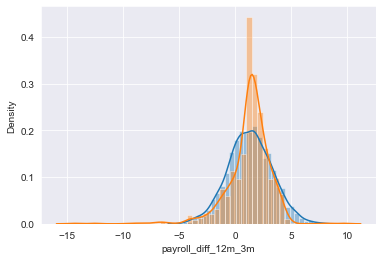

In [50]:
sns.distplot(multivariate_data['payroll_diff_12m_3m'])
sns.distplot(X['payroll_diff_12m_3m'])

C:\Users\zhuk3\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zhuk3\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='policy_rate_delta_12m', ylabel='Density'>

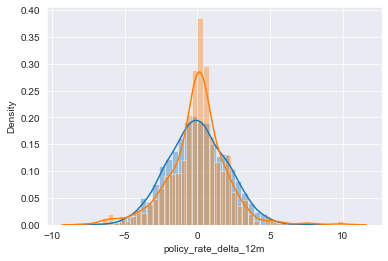

In [51]:
sns.distplot(multivariate_data['policy_rate_delta_12m'])
sns.distplot(X['policy_rate_delta_12m'])

C:\Users\zhuk3\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zhuk3\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CPI_delta_12m', ylabel='Density'>

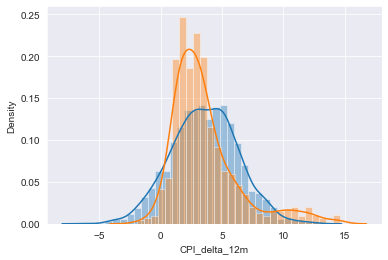

In [52]:
sns.distplot(multivariate_data['CPI_delta_12m'])
sns.distplot(X['CPI_delta_12m'])

C:\Users\zhuk3\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zhuk3\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='yield_10y_delta6m', ylabel='Density'>

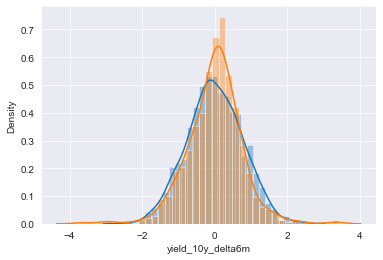

In [53]:
sns.distplot(multivariate_data['yield_10y_delta6m'])
sns.distplot(X['yield_10y_delta6m'])

C:\Users\zhuk3\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zhuk3\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='yield_spread', ylabel='Density'>

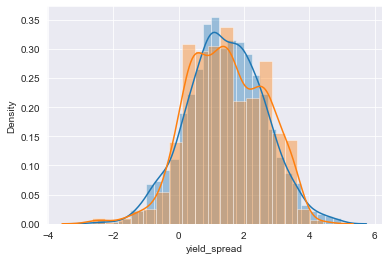

In [54]:
sns.distplot(multivariate_data['yield_spread'])
sns.distplot(X['yield_spread'])

C:\Users\zhuk3\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zhuk3\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sp500_delta_12m', ylabel='Density'>

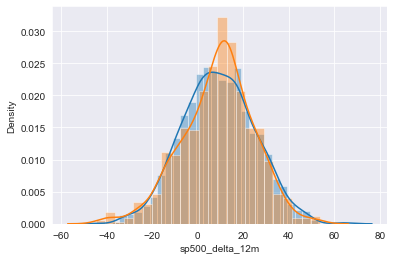

In [55]:
sns.distplot(multivariate_data['sp500_delta_12m'])
sns.distplot(X['sp500_delta_12m'])

C:\Users\zhuk3\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zhuk3\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='vol_30d', ylabel='Density'>

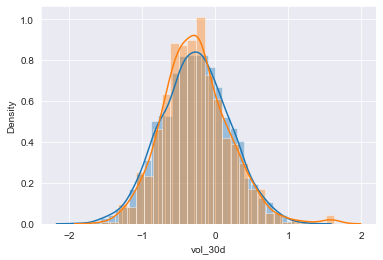

In [56]:
sns.distplot(multivariate_data['log_vol_30d'])
sns.distplot(np.log(X['vol_30d']))

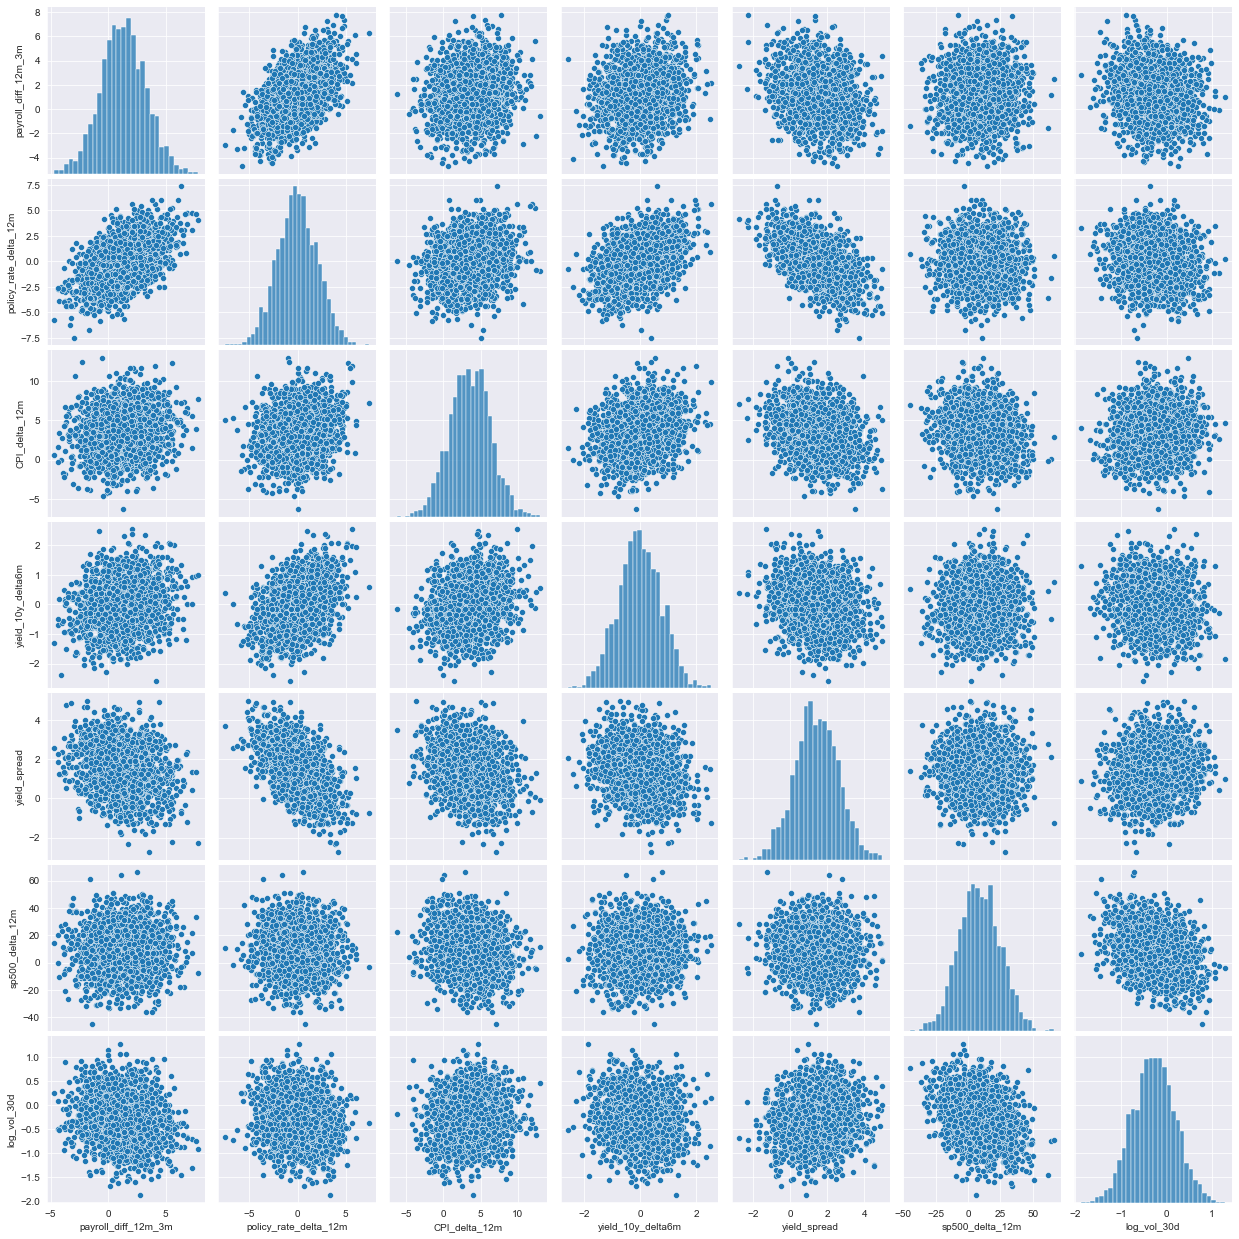

In [57]:
sns.pairplot(multivariate_data)

- Conclusion: The simulated data doesn't look similar to the original data distribution
- so we can't not use the Multivariant Normal method

# Method2: Estimate the Empirical Joint Distribution

In [58]:
from sklearn.neighbors import KernelDensity

In [59]:
# Estimating the empirical joint distribution
kde = KernelDensity(kernel='gaussian', bandwidth=0.15).fit(X.to_numpy())

In [60]:
# Simulate new data set by drawing samples from the empirical distribution
# Simulated data size is 2000
simulated_data = kde.sample(2000)
simulated_data = pd.DataFrame(simulated_data, columns=X.columns)
simulated_data

payroll_diff_12m_3m  policy_rate_delta_12m  CPI_delta_12m  \
0                1.261096               1.651247       3.878223   
1               -3.212261              -2.117890       3.053535   
2                3.379423               0.483985       1.616884   
3                1.152917              -0.646910       2.972442   
4                2.415416               0.060708       6.939029   
...                   ...                    ...            ...   
1995             1.017638               0.183032       3.573501   
1996             1.090217              -0.342990       1.961595   
1997             3.242982               3.272143       5.847209   
1998            -0.831931              -3.036993       2.752432   
1999            -1.101301              -1.766584       1.913487   

      yield_10y_delta6m  yield_spread  sp500_delta_12m   vol_30d  
0              0.155859     -0.349910         6.887453  0.462762  
1             -0.426569      2.420224        -4.639886  0.692301  
2              0.101120      0.218875         2.508535  0.778058  
3             -0.758850      2.817773        10.340056  0.364463  
4              0.366209      2.561290        -3.781061  0.739875  
...                 ...           ...              ...       ...  
1995           0.124030      0.457545         0.916410  0.418423  
1996           0.167969      0.485508        13.048754  1.495319  
1997           0.671811      0.102924        -9.256025  0.817469  
1998          -0.171468      2.317774        29.437561  0.728490  
1999          -0.829541      2.559070       -19.321177  2.647118  

[2000 rows x 7 columns]

In [61]:
X.columns

Index(['payroll_diff_12m_3m', 'policy_rate_delta_12m', 'CPI_delta_12m',
       'yield_10y_delta6m', 'yield_spread', 'sp500_delta_12m', 'vol_30d'],
      dtype='object')

### Plot simulated data & original data distribution

C:\Users\zhuk3\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zhuk3\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='payroll_diff_12m_3m', ylabel='Density'>

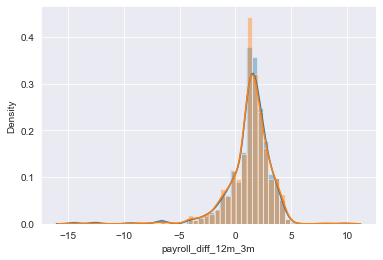

In [62]:
sns.distplot(simulated_data['payroll_diff_12m_3m'])
sns.distplot(X['payroll_diff_12m_3m'])

C:\Users\zhuk3\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zhuk3\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='policy_rate_delta_12m', ylabel='Density'>

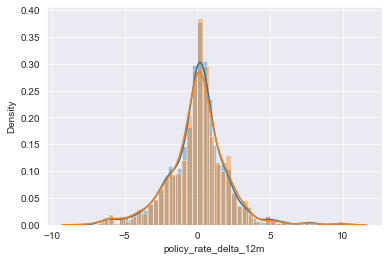

In [64]:
sns.distplot(simulated_data['policy_rate_delta_12m'])
sns.distplot(X['policy_rate_delta_12m'])

C:\Users\zhuk3\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zhuk3\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CPI_delta_12m', ylabel='Density'>

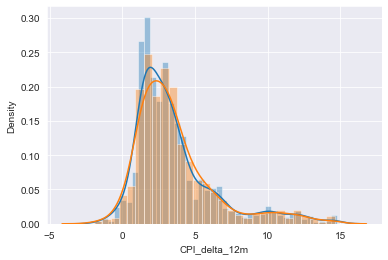

In [65]:
sns.distplot(simulated_data['CPI_delta_12m'])
sns.distplot(X['CPI_delta_12m'])

C:\Users\zhuk3\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zhuk3\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='yield_10y_delta6m', ylabel='Density'>

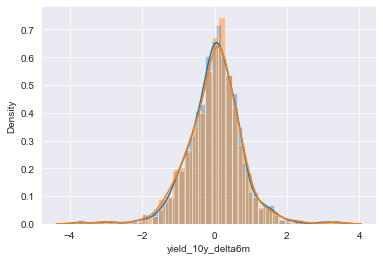

In [67]:
sns.distplot(simulated_data['yield_10y_delta6m'])
sns.distplot(X['yield_10y_delta6m'])

C:\Users\zhuk3\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zhuk3\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='yield_spread', ylabel='Density'>

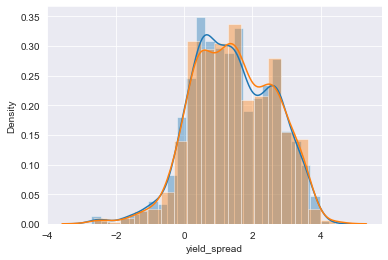

In [68]:
sns.distplot(simulated_data['yield_spread'])
sns.distplot(X['yield_spread'])

C:\Users\zhuk3\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zhuk3\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sp500_delta_12m', ylabel='Density'>

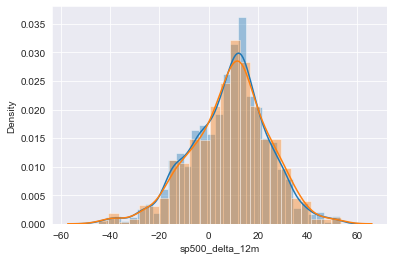

In [69]:
sns.distplot(simulated_data['sp500_delta_12m'])
sns.distplot(X['sp500_delta_12m'])

C:\Users\zhuk3\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zhuk3\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='vol_30d', ylabel='Density'>

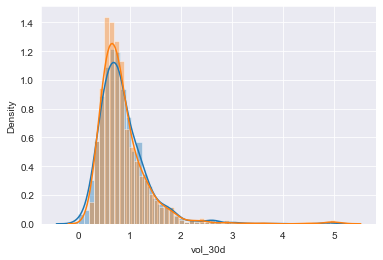

In [70]:
sns.distplot(simulated_data['vol_30d'])
sns.distplot(X['vol_30d'])

### Plot pair wise relationship

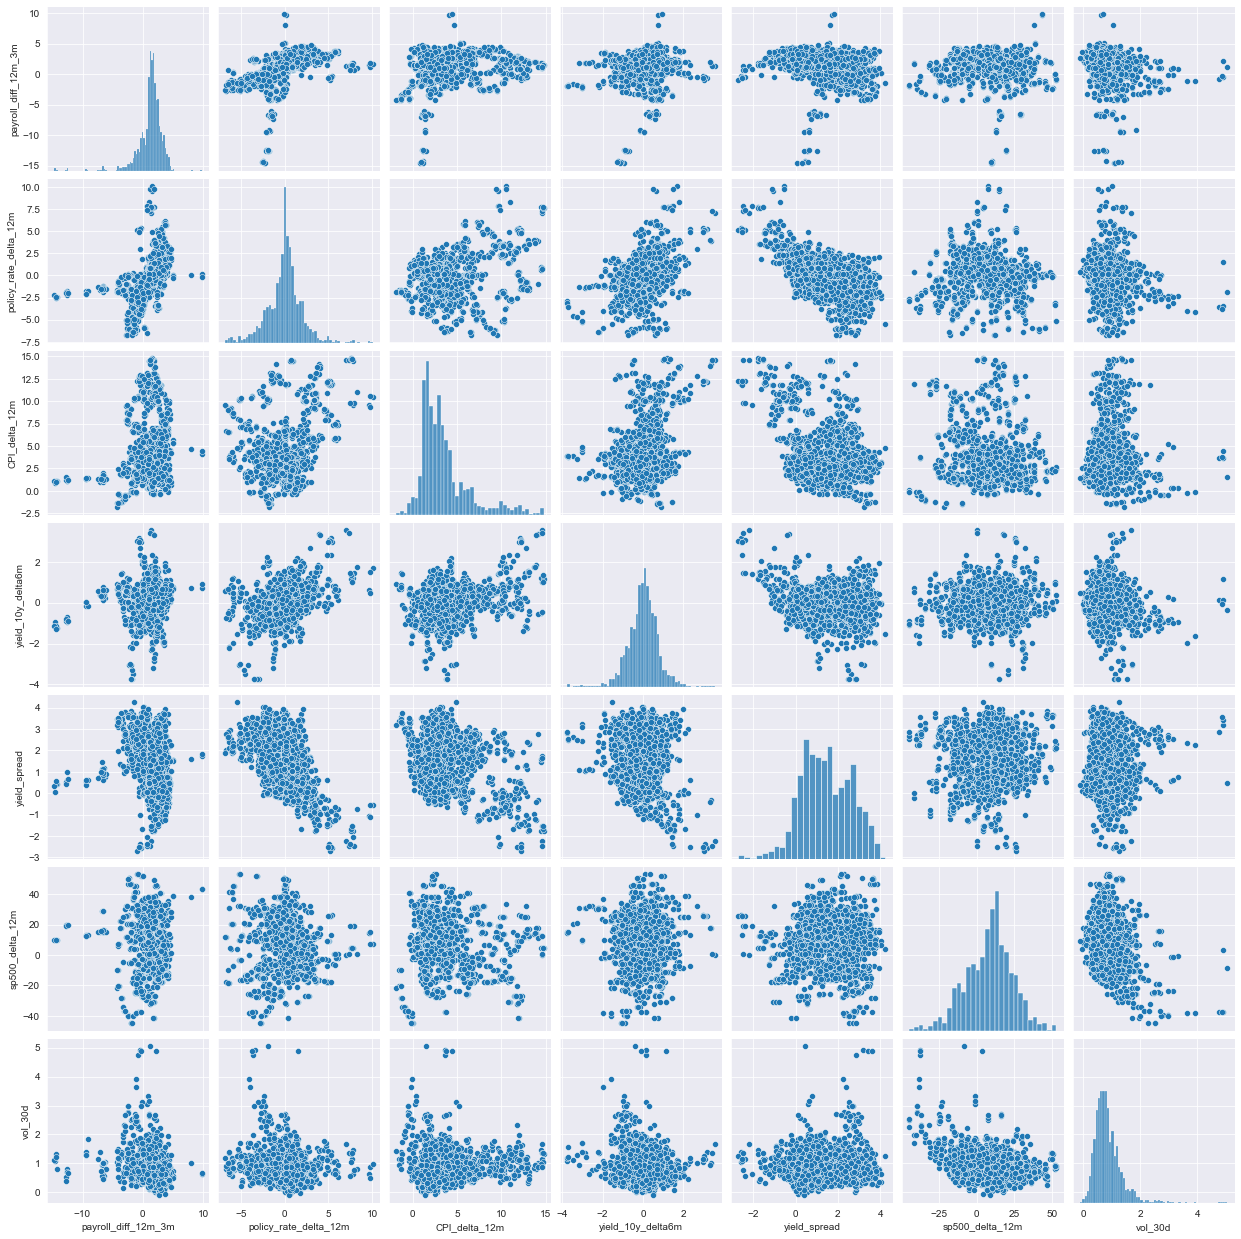

In [71]:
sns.pairplot(simulated_data)

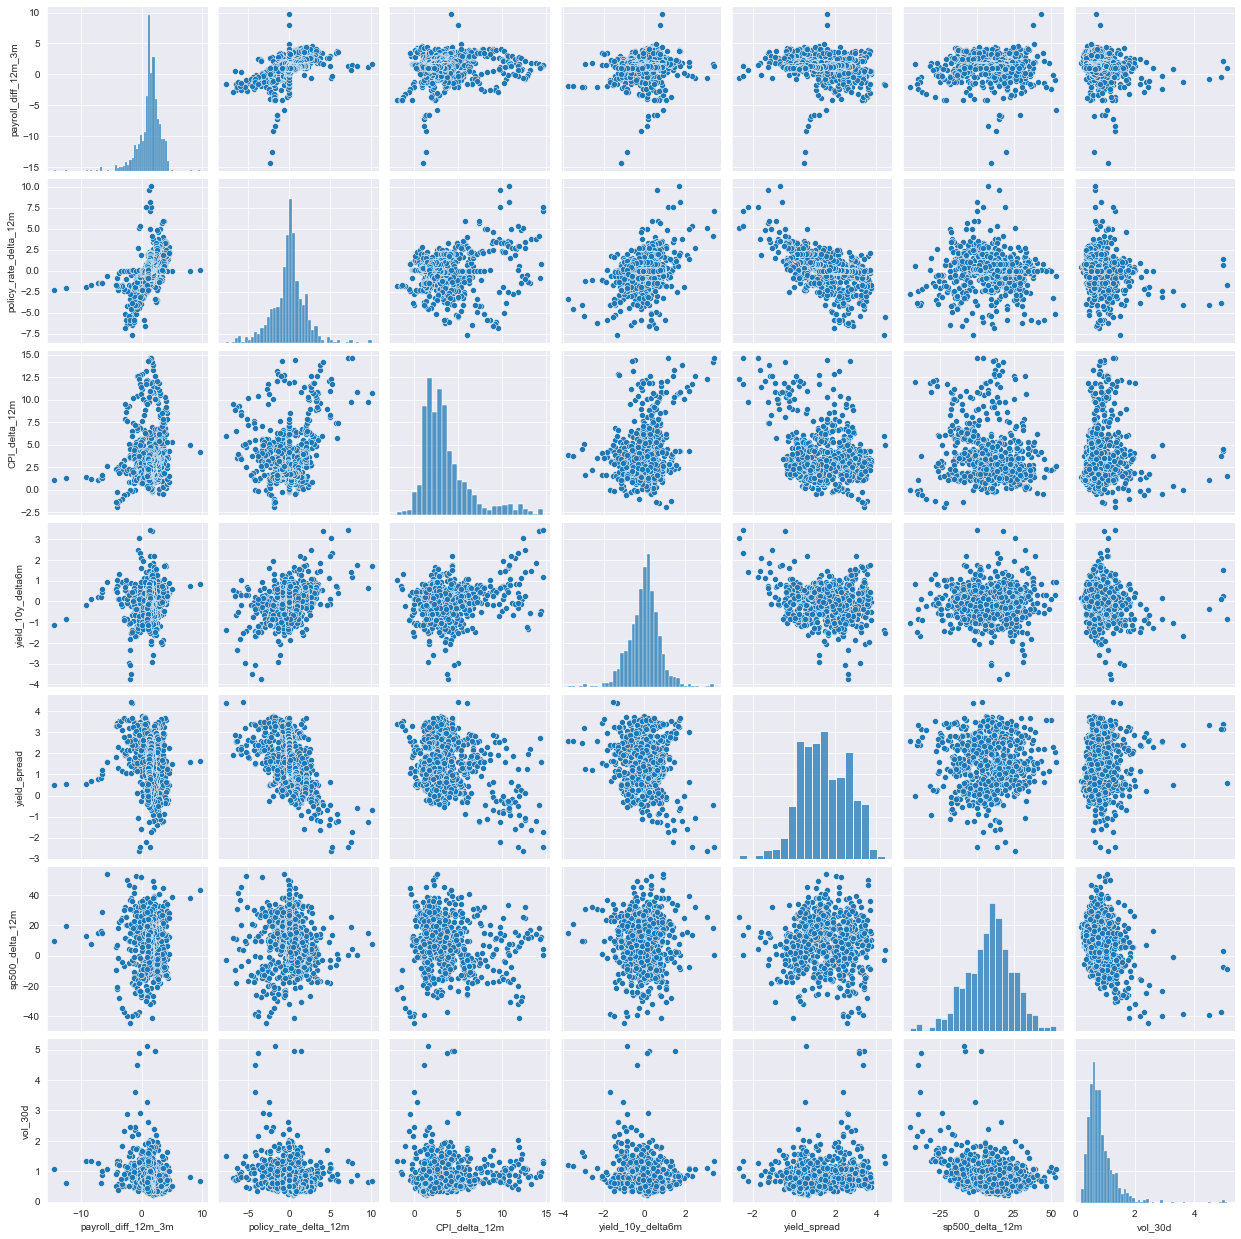

In [72]:
sns.pairplot(X)

- We can see that the simulated data distribution is very close to the original data distribution
- The pairwise relationship in the simulated data set is close to original as well
- We can say the kernel estimation does a good job in estimating the joint distribution

# Simulate X & Y by estimating joint density between X & Y

In [73]:
# For model 3, features used are:
all_cols = ['payroll_diff_12m_3m',
            'policy_rate_delta_12m',
            'CPI_delta_12m',
            'yield_10y_delta6m',
            'yield_spread',
            'sp500_delta_12m',
            'vol_30d',
            'recession_3m'
            ]

Xy = all_df[all_cols].copy().dropna()
Xy

payroll_diff_12m_3m  policy_rate_delta_12m  CPI_delta_12m  \
date                                                                    
1955-07-01             2.935970                   0.88      -0.372301   
1955-08-01             3.494027                   0.74      -0.484171   
1955-09-01             3.931277                   1.11       0.149198   
1955-10-01             4.214637                   1.39       0.374251   
1955-11-01             3.963344                   1.52       0.373413   
...                         ...                    ...            ...   
2021-11-01             3.045375                  -0.01       6.828372   
2021-12-01             3.434245                  -0.01       7.096542   
2022-01-01             3.528676                  -0.01       7.525934   
2022-02-01             3.468266                   0.00       7.912024   
2022-03-01             3.365671                   0.13       8.557586   

            yield_10y_delta6m  yield_spread  sp500_delta_12m   vol_30d  \
date                                                                     
1955-07-01               0.29          1.30        40.932648  0.861181   
1955-08-01               0.32          1.07        44.753605  0.712645   
1955-09-01               0.29          0.90        35.159382  1.436967   
1955-10-01               0.13          0.65        33.648989  1.647236   
1955-11-01               0.13          0.65        32.914708  0.858264   
...                       ...           ...              ...       ...   
2021-11-01              -0.06          1.51        26.103444  0.729942   
2021-12-01              -0.05          1.41        26.892739  1.112502   
2022-01-01               0.44          1.61        21.573991  1.122077   
2022-02-01               0.65          1.60        14.766935  1.390119   
2022-03-01               0.76          1.69        14.033116  1.486786   

            recession_3m  
date                      
1955-07-01           1.0  
1955-08-01           1.0  
1955-09-01           1.0  
1955-10-01           1.0  
1955-11-01           1.0  
...                  ...  
2021-11-01           1.0  
2021-12-01           1.0  
2022-01-01           1.0  
2022-02-01           0.0  
2022-03-01           0.0  

[801 rows x 8 columns]

In [74]:
# Estimating the empirical joint distribution
kde_xy = KernelDensity(kernel='gaussian', bandwidth=0.15).fit(Xy.to_numpy())

In [75]:
# Simulate new data set by drawing samples from the empirical distribution
# Simulated data size is 2000
simulated_xy = kde_xy.sample(2000)
simulated_xy = pd.DataFrame(simulated_xy, columns=Xy.columns)
simulated_xy

payroll_diff_12m_3m  policy_rate_delta_12m  CPI_delta_12m  \
0                3.629180               2.297492       7.408549   
1                2.069897               2.362945       4.627074   
2                0.888910              -0.109077       3.178052   
3                3.572224               0.864768       2.545472   
4               -0.548397              -2.459857       4.981626   
...                   ...                    ...            ...   
1995             1.936403              -0.479768       2.125127   
1996             2.058629               0.504507       1.260459   
1997             1.653946               3.640988      13.974436   
1998            -0.033782              -1.921035       1.358625   
1999             1.327336               0.314940       1.204186   

      yield_10y_delta6m  yield_spread  sp500_delta_12m   vol_30d  recession_3m  
0              0.737983      1.809052         1.099802  0.725895      0.112469  
1              0.028577      1.354110        12.427763  0.500510      0.123783  
2              0.345697      3.683284        17.241035  0.942082     -0.115435  
3              0.809460     -0.058367         4.375608  0.487779      0.945210  
4             -0.444854      2.761189         8.078328  1.180202      1.023100  
...                 ...           ...              ...       ...           ...  
1995           0.798839      1.301708        19.209629  1.303484      0.054466  
1996           0.010928      0.499262        20.335536  0.210680      0.227007  
1997           2.027308     -1.179562        14.218852  0.749211      1.136785  
1998          -0.372427      1.730758        -3.012976  0.544679     -0.128122  
1999          -0.518057      1.872945        -2.497953  1.421828      1.005125  

[2000 rows x 8 columns]

C:\Users\zhuk3\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='recession_3m', ylabel='Density'>

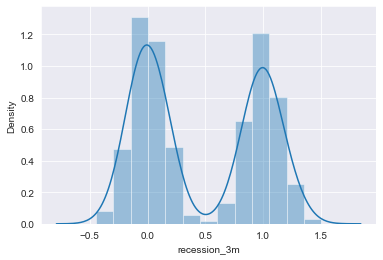

In [76]:
sns.distplot(simulated_xy['recession_3m'])

In [77]:
# We can see from the simulated y variable, it has two sub-distribution centered at 0 and 1 respectively
# Transform them to 0, 1 indicator: 0 if <0.5 and 1 if > 0.5
simulated_xy['transformed_recession_3m'] = np.where(simulated_xy['recession_3m'] <= 0.5, 0, 1)
simulated_xy

payroll_diff_12m_3m  policy_rate_delta_12m  CPI_delta_12m  \
0                3.629180               2.297492       7.408549   
1                2.069897               2.362945       4.627074   
2                0.888910              -0.109077       3.178052   
3                3.572224               0.864768       2.545472   
4               -0.548397              -2.459857       4.981626   
...                   ...                    ...            ...   
1995             1.936403              -0.479768       2.125127   
1996             2.058629               0.504507       1.260459   
1997             1.653946               3.640988      13.974436   
1998            -0.033782              -1.921035       1.358625   
1999             1.327336               0.314940       1.204186   

      yield_10y_delta6m  yield_spread  sp500_delta_12m   vol_30d  \
0              0.737983      1.809052         1.099802  0.725895   
1              0.028577      1.354110        12.427763  0.500510   
2              0.345697      3.683284        17.241035  0.942082   
3              0.809460     -0.058367         4.375608  0.487779   
4             -0.444854      2.761189         8.078328  1.180202   
...                 ...           ...              ...       ...   
1995           0.798839      1.301708        19.209629  1.303484   
1996           0.010928      0.499262        20.335536  0.210680   
1997           2.027308     -1.179562        14.218852  0.749211   
1998          -0.372427      1.730758        -3.012976  0.544679   
1999          -0.518057      1.872945        -2.497953  1.421828   

      recession_3m  transformed_recession_3m  
0         0.112469                         0  
1         0.123783                         0  
2        -0.115435                         0  
3         0.945210                         1  
4         1.023100                         1  
...            ...                       ...  
1995      0.054466                         0  
1996      0.227007                         0  
1997      1.136785                         1  
1998     -0.128122                         0  
1999      1.005125                         1  

[2000 rows x 9 columns]

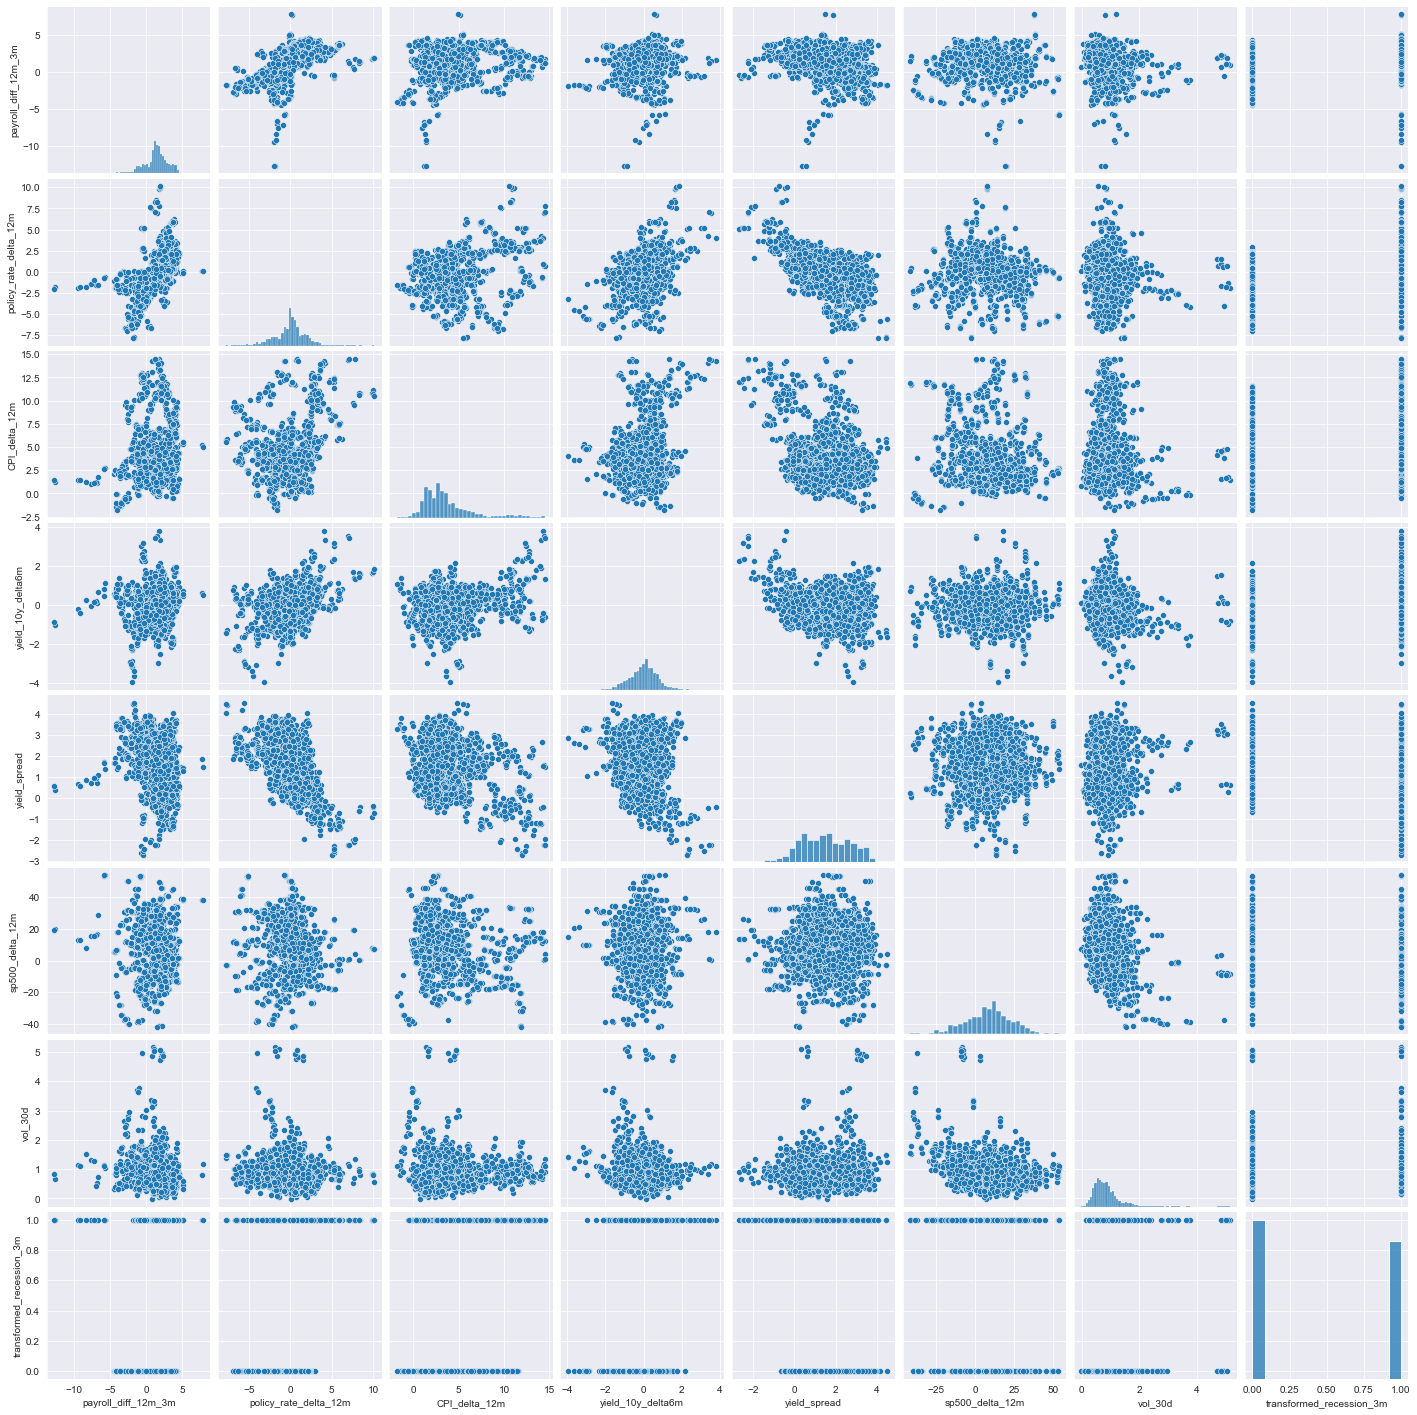

In [78]:
sns.pairplot(simulated_xy[['payroll_diff_12m_3m',
                          'policy_rate_delta_12m',
                          'CPI_delta_12m',
                          'yield_10y_delta6m',
                          'yield_spread',
                          'sp500_delta_12m',
                          'vol_30d',
                          'transformed_recession_3m']])

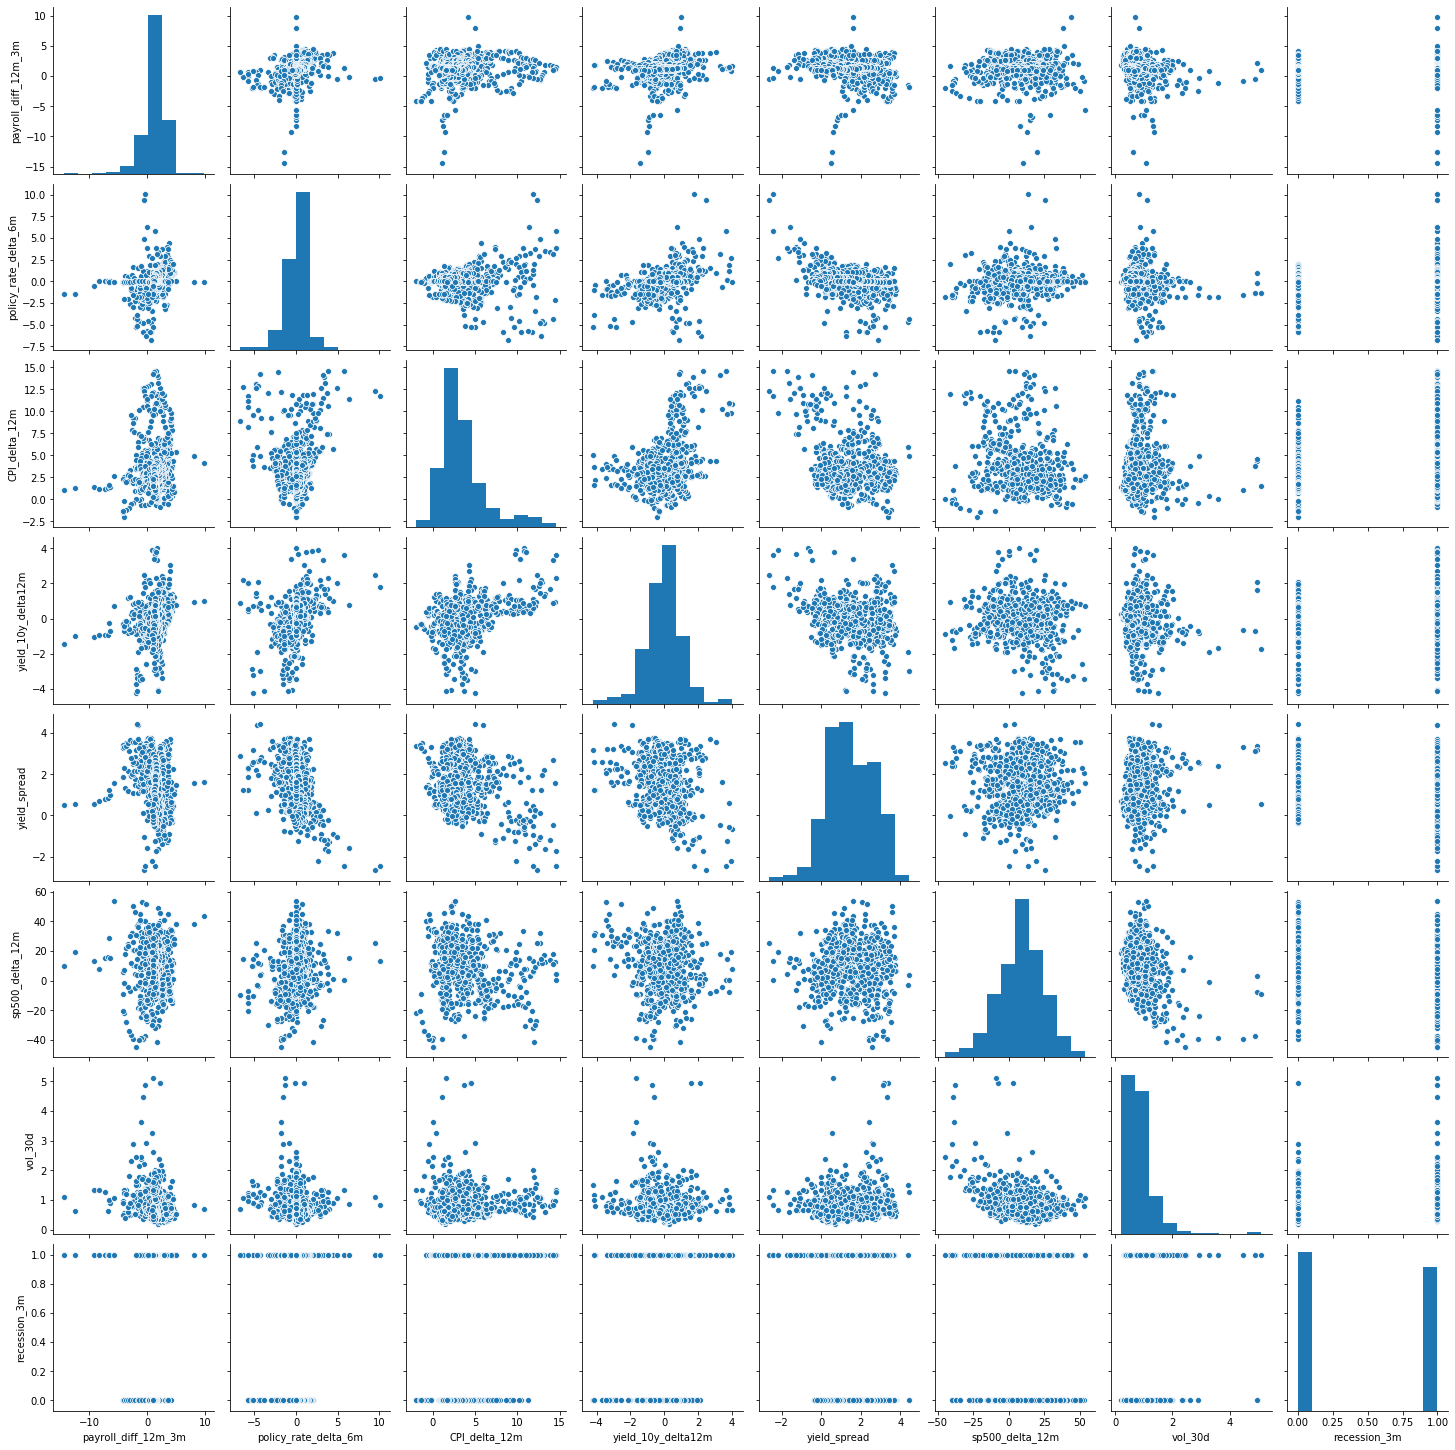

In [297]:
sns.pairplot(Xy)

### Read the SVC Model

In [79]:
import pickle

fold_path = f'data_folder/experiments_out_sample_new/svc/exp_1522/fold_0'
filename = f'{fold_path}/model.pkl'

with open(filename, 'rb') as f:
    svc_model = pickle.load(f)

# Show model parameters
svc_model.pipeline.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('classifier', SVC(C=4.3, degree=1, probability=True))],
 'verbose': False,
 'scaler': StandardScaler(),
 'classifier': SVC(C=4.3, degree=1, probability=True),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'classifier__C': 4.3,
 'classifier__break_ties': False,
 'classifier__cache_size': 200,
 'classifier__class_weight': None,
 'classifier__coef0': 0.0,
 'classifier__decision_function_shape': 'ovr',
 'classifier__degree': 1,
 'classifier__gamma': 'scale',
 'classifier__kernel': 'rbf',
 'classifier__max_iter': -1,
 'classifier__probability': True,
 'classifier__random_state': None,
 'classifier__shrinking': True,
 'classifier__tol': 0.001,
 'classifier__verbose': False}

### Test on the model performance
- Use our SVC model to predict with the simulated features
- Compared predicted y with simulated y

In [80]:
y_data = svc_model.get_prediction(simulated_xy[['payroll_diff_12m_3m',
                                              'policy_rate_delta_12m',
                                              'CPI_delta_12m',
                                              'yield_10y_delta6m',
                                              'yield_spread',
                                              'sp500_delta_12m',
                                              'vol_30d']],
                                       simulated_xy['transformed_recession_3m'].reset_index()
                                       )
y_data

index  transformed_recession_3m  y_pred    prob_0    prob_1
0         0                         0     0.0  0.892644  0.107356
1         1                         0     0.0  0.964783  0.035217
2         2                         0     0.0  0.994359  0.005641
3         3                         1     1.0  0.011171  0.988829
4         4                         1     1.0  0.386118  0.613882
...     ...                       ...     ...       ...       ...
1995   1995                         0     0.0  0.926744  0.073256
1996   1996                         0     0.0  0.988632  0.011368
1997   1997                         1     1.0  0.006496  0.993504
1998   1998                         0     0.0  0.814138  0.185862
1999   1999                         1     1.0  0.340098  0.659902

[2000 rows x 5 columns]

In [81]:
import experiment

metrics_info = experiment.get_model_metrics(y_data['transformed_recession_3m'], y_data['y_pred'])
metrics_info

{'accuracy': 0.867,
 'balanced_accuracy': 0.86465681841021,
 'average_precision': 0.8069629263891936,
 'f1_binary': 0.8532008830022074,
 'f1_micro': 0.867,
 'f1_macro': 0.865814335468197,
 'f1_weighted': 0.8666972771408161,
 'precision': 0.8764172335600907,
 'recall': 0.8311827956989247,
 'roc_auc_micro': 0.86465681841021,
 'roc_auc_macro': 0.86465681841021,
 'roc_auc_weighted': 0.86465681841021}

- The model works well on the simulated data as well